# 🧠 Binary Classification Motivation 

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

**Imagine you're sorting apples from oranges.** That’s binary classification: the task of putting things into one of two buckets — yes/no, spam/ham, sick/healthy.

In machine learning, binary classification is the **entry point** to intelligent decision-making. It's a **foundation stone** for:
- Medical diagnosis (disease or no disease),
- Email filters (spam or not),
- Fraud detection (legit or fraud),
- Even deciding if a customer will churn.

> **Analogy:** It's like a bouncer at a club checking ID. The model (bouncer) looks at the data (face, clothes, demeanor) and says: "You’re in" or "Nope."

---

### 🔑 **Key Terminology**

| Term            | Analogy/Explanation |
|------------------|---------------------|
| **Feature**      | The clues you give the model. Like telling a chef the ingredients before cooking. |
| **Label**        | The final dish — what we’re trying to make. Binary: 0 or 1. |
| **Decision Boundary** | A line/fence in space that says “this side is cats, that side is dogs.” |
| **Logistic Function** | Like a dimmer switch — smoothly transitions between “no” and “yes”. |
| **Threshold**    | A line in the sand — above this probability? Predict 1. Below? Predict 0. |

---

### 💼 **Use Cases**

1. **Medical Diagnosis**: Will the patient get diabetes?
2. **Spam Filtering**: Is this email spam?
3. **Credit Risk**: Will this person default?

```text
   +------------------+
   |  Binary Problem? |
   +--------+---------+
            |
         [Yes]
            |
     +------v------+
     | Use Logistic|
     | Regression  |
     +-------------+
```

---

## **2. Mathematical Deep Dive** 🧮

### 📏 **Core Equation**

We use **Logistic Regression**, where we squish a linear function using a **sigmoid** to predict probabilities:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

---

### 🎢 **Math Intuition**

- Think of **$\theta^T x$** as a seesaw.
- If it tilts right (positive), output approaches 1.
- Tilt left (negative), output nears 0.
- The **sigmoid** is like a "soft yes" vs "hard no".

---

### ⚠️ **Assumptions & Constraints**

- Assumes linear separation (draw a line and classify).
- **Pitfall**: Not great for problems where classes overlap weirdly.
- Sensitive to **outliers** and **imbalanced datasets**.

---

## **3. Practical Considerations** ⚙️

### 🎚️ **Hyperparameters**

- **Learning Rate (α)**: Too big? Overshoot. Too small? Slow train.
- **Regularization (λ)**: Prevents overfitting (like guardrails on a winding road).

### 📊 **Evaluation Metrics**

- **Accuracy**: Only okay for balanced data.
- **Precision/Recall/F1**: Use when false positives/negatives are costly.

```python
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
```

### 🛠️ **Production Tips**

- Use **batching** or **GPU acceleration** for huge datasets.
- Add **monitoring** in production for performance drift.

---

## **4. Critical Analysis** 🔍

| Strengths                          | Weaknesses                            |
|-----------------------------------|----------------------------------------|
| Fast, simple, interpretable       | Assumes linearity                      |
| Good for baseline models          | Poor for high-dimensional or nonlinear data |

### 🧠 **Ethical Lens**

- **Bias** in labels leads to **biased predictions** (e.g., hiring or policing).
- Transparency is key — logistic regression is explainable but still needs oversight.

### 🔬 **Research Updates**

- **Post-2020 Trends**:
  - Calibrated probabilities using Platt scaling.
  - Fair classification with constrained optimization.
  - Search: “fair logistic regression 2023 site:arxiv.org”

---

## **5. Interactive Elements** 🎯

### ✅ **Concept Checks (HARD)**

1. **Which of these would benefit least from binary classification?**
   - A) Email spam filtering  
   - B) Credit card fraud detection  
   - C) Predicting movie genre  
   - D) Diagnosing cancer (yes/no)

**Answer**: C. Movie genre isn’t binary!

---

### 🧩 **Code Debug Challenge**

```python
def predict(x):
    return 1 / (1 + exp(x))  # What's wrong?

# Fix:
import numpy as np

def predict(x: float) -> float:
    return 1 / (1 + np.exp(-x))
```

> **Issue**: Forgot the negative sign in the exponent, and didn't import numpy.

---

## **6. 📚 Glossary**

| Term             | Simple Explanation |
|------------------|--------------------|
| **Binary**       | Two choices: yes/no, 0/1. |
| **Classifier**   | A decision-making system. |
| **Sigmoid**      | S-shape curve turning scores into probabilities. |
| **Overfitting**  | Model memorizes instead of learning. |
| **Feature Vector** | A list of clues you feed the model. |

---


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        74
           1       1.00      0.96      0.98        76

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150


Confusion Matrix:
[[74  0]
 [ 3 73]]


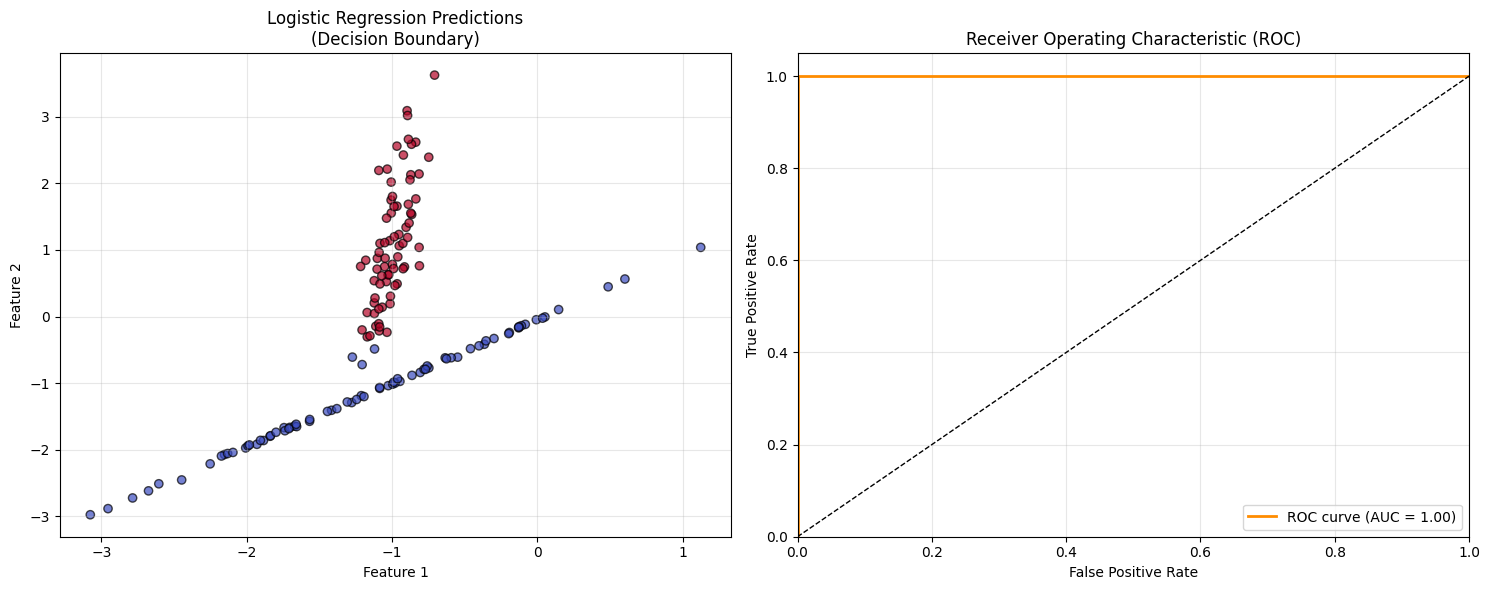

In [37]:
## **7. 🐍 Full Python Code + Visualization**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, confusion_matrix

# 1. Generate dummy data (increased samples for better ROC)
X, y = make_classification(n_samples=500, n_features=2, n_classes=2, 
                         n_redundant=0, n_clusters_per_class=1, 
                         random_state=30)

# 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

# 3. Train logistic model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# 5. Evaluation reports
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

# 7. Visualizations
plt.figure(figsize=(15, 6))

# Plot 1: Decision Boundary and Predictions
plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k', alpha=0.7)
plt.title("Logistic Regression Predictions\n(Decision Boundary)", fontsize=12)
plt.xlabel("Feature 1", fontsize=10)
plt.ylabel("Feature 2", fontsize=10)
plt.grid(True, alpha=0.3)

# Plot 2: ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=12)
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 🔍 **Sigmoid Function & Probability Output**  
*(Part of: 🧩 1. Understanding Logistic Regression)*  
> A clean, jargon-free breakdown — with the **Feynman Technique**, analogies, math intuition, and code.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

When your model makes a decision — like "Is this email spam?" — we don’t want it to **just blurt out a 0 or 1**. We want it to tell us **how confident** it is.

That’s where the **Sigmoid Function** steps in.

> **Analogy**: Think of the sigmoid like a **thermometer for certainty**. Instead of shouting YES/NO, it whispers:  
> “I’m 92% sure it’s a YES…”  
> “Only 10% sure it’s a YES…”

This is super important because:
- It gives us **probabilities**, not just hard labels.
- We can then decide: "Should we act on this prediction now, or wait for more info?"

---

### 🔑 **Key Terminology**

| Term             | Metaphor/Analogy |
|------------------|------------------|
| **Sigmoid**      | A “squish” function turning raw scores into a [0, 1] range. Like pressing clay into a mold. |
| **Probability Output** | How sure the model is — like weather forecast: "60% rain." |
| **Log-Odds**     | Like betting odds; log of the ratio between "yes" and "no". |
| **Linear Score ($z$)** | The raw input to sigmoid — like a seesaw tipping toward yes/no. |

---

## **2. Mathematical Deep Dive** 🧮

### 📏 **Core Equation**

Given input vector \( x \), the linear function is:

$$
z = \theta^T x
$$

The **sigmoid** turns this into a probability:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This maps:
- Large negative \( z \Rightarrow \) output near **0**
- Large positive \( z \Rightarrow \) output near **1**
- \( z = 0 \Rightarrow \) output = **0.5**

---

### 🎢 **Math Intuition**

- Think of \( z \) as **position on a balance beam**.
- The sigmoid is like a **soft switch**:
  - If \( z \) is far left → it's a strong “no”.
  - If \( z \) is far right → it’s a strong “yes”.
- Smoothly transitions between extremes. No sudden jumps.

> Unlike a step function (which just says YES or NO), the sigmoid respects **uncertainty**.

---

### ⚠️ **Assumptions & Constraints**

- Assumes **outputs are probabilistic**.
- Not suitable for multi-class **without adaptation** (we’ll need softmax later).
- **Pitfall**: Very large or very small \( z \) values can cause **numerical instability** (floating point overflow/underflow).

---

## **3. Practical Considerations** ⚙️

### 🎛️ **How to Use the Output**

- **Before classification**: Keep the sigmoid output as-is (for ranking or decision curves).
- **For classification**: Apply a **threshold**. Usually:

```python
if sigmoid(z) >= 0.5:
    predict 1
else:
    predict 0
```

But you can adjust that threshold (e.g., 0.7) for better **recall** or **precision**.

---

### 🛠️ **Debug Tips & Warnings**

- If all outputs look like **0.5**, your model may not be learning (weights near zero).
- If everything’s 0 or 1, your sigmoid might be **saturated** — try **feature scaling** or **regularization**.

---

## **4. Critical Analysis** 🔍

| Pros of Sigmoid               | Cons of Sigmoid                   |
|------------------------------|-----------------------------------|
| Smooth, interpretable output | Saturates at extremes             |
| Probabilistic interpretation | Gradient becomes vanishingly small |
| Easy to implement            | Not ideal for deep networks (ReLU preferred there) |

---

## **5. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** If the sigmoid output is **0.5**, what does it mean?  
- A) The model is strongly confident in class 1  
- B) The model is uncertain  
- C) The model is broken  
- D) The data is linearly separable

**Correct Answer**: **B**

> 0.5 means the model is **undecided** — it’s right at the decision boundary.

---

### 🧩 **Code Debug**

```python
def sigmoid(x):
    return 1 / (1 - np.exp(-x))  # Bug here!

# Fix:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
```

> Bug: Wrong sign in the denominator. Result blows up when x is negative.

---

## **6. 📚 Glossary**

| Term         | Beginner-Friendly Meaning |
|--------------|----------------------------|
| **Sigmoid**  | A math squish function that turns any number into a value between 0 and 1. |
| **Threshold**| A cutoff: Above this, we say “yes”; below, “no”. |
| **Log-Odds** | The mathematical way to express "how sure we are" using logs. |
| **Activation Function** | The part of a model that makes decisions non-linear. |
| **Saturation** | When outputs get stuck near 0 or 1 and gradients vanish. |

---


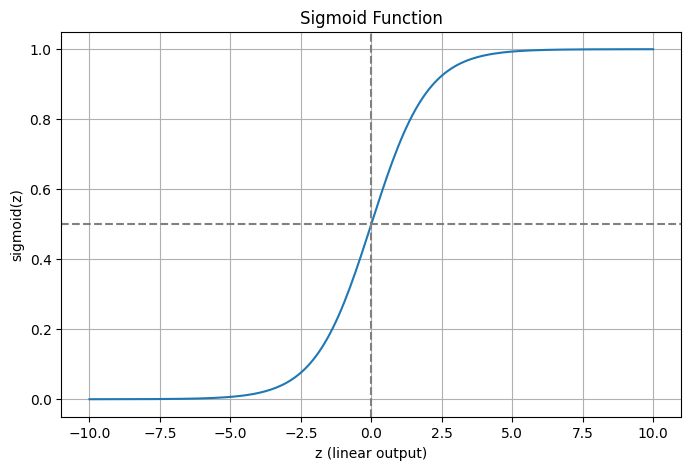

In [38]:

## **7. 🐍 Python Code + Plot**

import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1 / (1 + np.exp(-z))

# Values to test sigmoid
z_values = np.linspace(-10, 10, 200)
sigmoid_values = sigmoid(z_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(z_values, sigmoid_values)
plt.title("Sigmoid Function")
plt.xlabel("z (linear output)")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='gray', linestyle='--')
plt.show()


# 🧭 **Decision Boundary Interpretation**  
*(Last sub-topic in: 🧩 1. Understanding Logistic Regression)*  
> Explained using analogies, visuals, equations, and traps beginners fall into.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

After we run our inputs through the sigmoid, we get a probability. Cool. But **how does the model decide** where the YESes and NOs go?

That’s the **Decision Boundary** — a **line** (or curve) that slices up the feature space.

> **Analogy**: Imagine you’re a farmer with apples and oranges scattered in your field. You stretch a rope across the land to divide them: apples on one side, oranges on the other. That rope? Your **decision boundary**.

This is **how a model visualizes its decision logic**.

---

### 🔑 **Key Terminology**

| Term                | Analogy or Explanation |
|---------------------|------------------------|
| **Decision Boundary** | Invisible fence between classes |
| **Feature Space**     | A map where each axis is a feature (height, color, weight, etc.) |
| **Linear Separator**  | A straight boundary — like a chalk line on a soccer field |
| **Nonlinear Boundary** | Wiggly, complex dividers needed for tough problems |

---

## **2. Mathematical Deep Dive** 🧮

### 📏 **Core Equation**

From logistic regression:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}} \\
$$

We predict class 1 if:

$$
h_\theta(x) \geq 0.5
$$

Which simplifies to:

$$
\theta^T x \geq 0
$$

**This equation defines the decision boundary.**

---

### 🎢 **Math Intuition**

- \( \theta^T x = 0 \) is a **hyperplane** in the feature space.
- For 2D data, it’s a line.
- For 3D, it’s a plane.
- For higher dimensions: a hyperplane.

> The boundary cuts the space into two parts: left = class 0, right = class 1.

---

### ⚠️ **Assumptions & Constraints**

- **Linear models** = straight-line boundaries.
- If the data is **not linearly separable**, logistic regression struggles.
- **Pitfall**: Misinterpreting the sigmoid curve itself as the decision boundary. The boundary is where **probability crosses 0.5**, not the shape of sigmoid.

---

## **3. Practical Considerations** ⚙️

### 🧪 **How to Visualize It**

Great for 2D datasets — plot the data, and draw the line where \( \theta^T x = 0 \).

### 🧠 **Model Explainability**

- The slope and intercept of the boundary tell us how the model is **weighing each feature**.
- Important in fields like **medicine or finance**, where we must justify decisions.

---

## **4. Critical Analysis** 🔍

| ✅ Pros                              | ❌ Cons                                |
|-------------------------------------|----------------------------------------|
| Interpretable                       | Only works well with linear data       |
| Easy to visualize in 2D             | Poor performance on curved distributions |
| Works fast for small datasets       | Can't model XOR-type patterns          |

---

## **5. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** Which of the following best defines the decision boundary in logistic regression?

- A) Where the sigmoid output is highest  
- B) Where \( \theta^T x = 0 \)  
- C) Where the input features are all zero  
- D) Where the model has 100% accuracy

**Answer**: **B**

> The decision boundary is mathematically where the **linear combination of features equals zero**, meaning the sigmoid crosses 0.5.

---

### 🧩 **Code Challenge** — Visualizing a Decision Boundary

```python
# Complete the missing part to plot the decision boundary
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0, random_state=42)
model = LogisticRegression()
model.fit(X, y)

# Get coefficients
theta = model.coef_[0]
intercept = model.intercept_

# Plotting
x_values = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
# FILL IN: equation for decision boundary line
y_values = -(theta[0] * x_values + intercept) / theta[1]

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.plot(x_values, y_values, label="Decision Boundary")
plt.legend()
plt.title("Decision Boundary from Logistic Regression")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()
```

---

## **6. 📚 Glossary**

| Term               | Meaning |
|--------------------|---------|
| **Boundary**        | A separator line between two classes |
| **Feature Space**   | Visual map of all feature combinations |
| **Linear Separator**| A line or plane drawn with a ruler |
| **Hyperplane**      | A multi-dimensional "plane" separating classes |
| **Sigmoid Threshold** | The cutoff (usually 0.5) that defines the boundary |


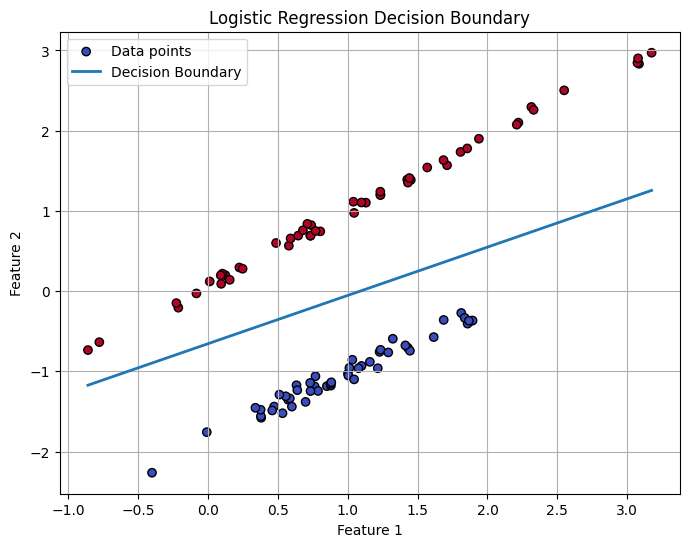

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# 1. Generate sample data (2 features, 2 classes)
X, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_redundant=0, 
                           n_informative=2, 
                           n_clusters_per_class=1, 
                           random_state=42)

# 2. Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# 3. Retrieve model parameters
coef = model.coef_[0]
intercept = model.intercept_[0]

# 4. Create decision boundary
# We solve for x2 in terms of x1 from: θ₀ + θ₁x₁ + θ₂x₂ = 0
x1_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_vals = -(coef[0] * x1_vals + intercept) / coef[1]  # y = - (w1*x1 + b) / w2

# 5. Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k', label='Data points')
plt.plot(x1_vals, x2_vals, label='Decision Boundary', linewidth=2)
plt.title("Logistic Regression Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.legend()
plt.show()


# 💸 Cost Function for Logistic Regression  
*(First topic in: 🧩 2. Training the Model)*  
> Why we need a cost function, how it works, math intuition, and coding it right.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

When training a model, we want to **reward it when it’s right** and **penalize it when it’s wrong**.

The **Cost Function** is how we teach the model **what “wrong” looks like** — like a compass telling it which direction to step in to improve.

> **Analogy**: Imagine training a puppy. You reward it with treats when it gets closer to the goal. The cost function is the feedback system — "bad dog" or "good dog."

Without a cost function:
- The model can’t learn.
- There’s no sense of direction for optimization (e.g., gradient descent).
- We can’t tell how good a set of weights really is.

---

### 🔑 **Key Terminology**

| Term            | Metaphor or Explanation |
|------------------|-------------------------|
| **Cost Function** | A “loss meter” — how badly the model is doing |
| **Loss**          | The penalty on a single prediction |
| **Objective Function** | The full thing we want to minimize |
| **Convex Function** | A “bowl-shaped” curve — only one lowest point |
| **Cross-Entropy** | A scoring method from information theory — measures surprise (more on that below) |

---

## **2. Mathematical Deep Dive** 🧮

### 📏 **Core Equation**

Let’s define the **Log Loss** (a.k.a. **binary cross-entropy**) for logistic regression:

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_\theta(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

Where:
- \( h_\theta(x) \) is the predicted probability
- \( y \in \{0, 1\} \)
- \( m \) is the number of training examples

---

### 🎢 **Math Intuition**

Let’s say the model is **very confident but wrong**:

- If actual \( y = 1 \), but \( h_\theta(x) = 0.01 \),  
  then \( \log(0.01) = -4.6 \) → **huge penalty**!

But if it’s correct and confident:

- \( y = 1 \), \( h_\theta(x) = 0.99 \),  
  then \( \log(0.99) ≈ -0.01 \) → **tiny penalty**!

> This function **encourages certainty when right** and **punishes certainty when wrong.**

---

### ⚠️ **Assumptions & Pitfalls**

- Assumes binary classification — doesn’t handle multi-class unless adapted (e.g., softmax).
- **Pitfall**: Taking log of 0 → math error! Avoid predicting **exactly 0 or 1**.
- Output should be **clipped** or **bounded** to avoid infinity.

---

## **3. Practical Considerations** ⚙️

### 🔍 **Implementation (NumPy)**

```python
import numpy as np

def compute_cost(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    m = len(y_true)
    # Avoid log(0) by clipping predictions
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
```

### ✅ **Why We Use It in Practice**

- Works well with **gradient descent** (we’ll see that next).
- **Convex** — meaning no “traps” or local minima. Always one global minimum.
- Works great with **probabilistic outputs** like sigmoid.

---

## **4. Critical Analysis** 🔍

| Strengths                     | Weaknesses                         |
|------------------------------|------------------------------------|
| Convex → easy to optimize    | Logarithms require care (no log(0)) |
| Encourages confident predictions | Very sensitive to outliers |
| Theoretically sound           | Doesn’t work out-of-the-box for multi-class |

---

## **5. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** Why does the cost skyrocket when the model is confidently wrong?

- A) Because of how gradients work  
- B) Because log(0) = 0  
- C) Because log(probability) becomes a large negative number  
- D) Because sigmoid values are too high

**Correct Answer**: **C**

> The log of a small number (like 0.01) is large and negative → big penalty.

---

### 🧩 **Code Debug Task**

```python
def log_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))  # what's missing?

# Fix:
def log_loss(y, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)  # prevent log(0)
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
```

---

## **6. 📚 Glossary**

| Term           | Explanation |
|----------------|-------------|
| **Cost Function** | Tells the model “how wrong” it is. |
| **Cross-Entropy** | Measures the difference between predicted and actual probabilities. |
| **Convexity**     | The shape of the cost curve — one bottom, no traps. |
| **Clipping**      | Prevents division by zero or log(0). |
| **Log Loss**      | Penalty system based on log of probability. |

---



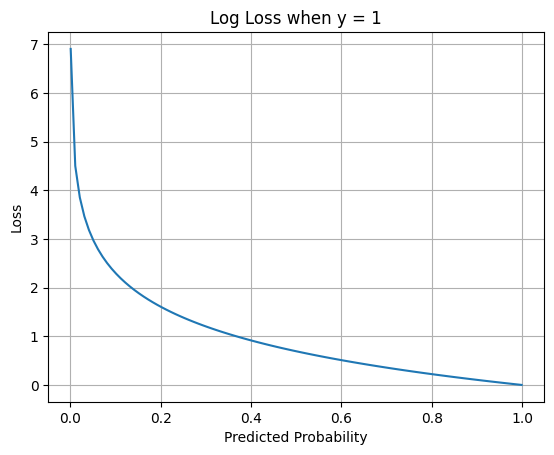

In [40]:

## **7. 🐍 Code + Plot**

import numpy as np
import matplotlib.pyplot as plt

y_true = 1
preds = np.linspace(0.001, 0.999, 100)
losses = - (y_true * np.log(preds) + (1 - y_true) * np.log(1 - preds))

plt.plot(preds, losses)
plt.title("Log Loss when y = 1")
plt.xlabel("Predicted Probability")
plt.ylabel("Loss")
plt.grid(True)
plt.show()

# 🧮 **Gradient Descent for Logistic Regression**  
*(Part of: 🧩 2. Training the Model)*  
> How the model learns step-by-step, why gradients matter, and how to make it work.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

Once we’ve got our **cost function** (from the last section), we now need a way to **minimize it** — that’s where **gradient descent** comes in.

> **Analogy**: Imagine you're skiing down a snowy mountain (the cost surface). You want to find the lowest point (minimum cost). Each step you take is based on the **slope** of the hill. That slope is the **gradient**.

In logistic regression, **we don’t know the best parameters** (\( \theta \)), but we can **gradually adjust them** to reduce the cost.

---

### 🔑 **Key Terminology**

| Term               | Explanation |
|--------------------|-------------|
| **Gradient**        | The slope of the cost function — tells us the direction of steepest climb. |
| **Learning Rate (α)** | How big each step is when we descend the slope. |
| **Update Rule**     | Formula used to tweak the weights in the right direction. |
| **Convergence**     | When the steps become so small we’ve hit the bottom. |
| **Epoch**           | One full pass through the training data. |

---

## **2. Mathematical Deep Dive** 🧮

### 📏 **Cost Recap (From Before)**

The cost function:

$$
J(\theta) = -\frac{1}{m} \sum \left[ y \log(h_\theta(x)) + (1 - y) \log(1 - h_\theta(x)) \right]
$$

With:

$$
h_\theta(x) = \frac{1}{1 + e^{-\theta^T x}}
$$

---

### 🚶‍♂️ **Gradient Descent Update Rule**

Each parameter \( \theta_j \) is updated as:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

For logistic regression:

$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_j^{(i)}
$$

---

### 🎢 **Math Intuition**

- The gradient tells us **which direction to move in parameter space**.
- We subtract the gradient because we’re **descending** toward the minimum.
- The **learning rate α** controls how big each step is.

> Too large? You overshoot.  
> Too small? You crawl forever.

---

### 🔁 **Batch vs. Stochastic vs. Mini-batch**

| Type          | Description | Use case |
|---------------|-------------|----------|
| **Batch GD**      | Uses all data in each step | Stable but slow |
| **Stochastic GD** | One data point at a time | Fast but noisy |
| **Mini-batch**    | Small random chunks | Best of both worlds |

---

### ⚠️ **Common Pitfalls**

- **Divergence**: Learning rate too high → cost goes up.
- **Vanishing updates**: Too low learning rate → model learns nothing.
- Forgetting to **normalize features** → features dominate based on scale.

---

## **3. Critical Analysis** 🔍

| Pros of Gradient Descent       | Cons of Gradient Descent |
|-------------------------------|----------------------------|
| Works with large datasets      | Needs careful tuning of α |
| Simple to implement            | Can get stuck on plateaus |
| Scales to high dimensions      | Slow without vectorization |

---

## **4. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** What happens if the gradient becomes very small during training?

- A) Learning rate increases
- B) The model skips steps
- C) Updates become tiny and learning slows down
- D) The cost function diverges

**Answer**: **C**  
> Small gradients → small parameter updates → slow learning.

---

### 🧩 **Code Debug**

```python
def gradient_step(X, y, theta, alpha):
    h = sigmoid(np.dot(X, theta))
    grad = X.T @ (y - h)  # Bug! Wrong direction
    return theta + alpha * grad  # Bug! Wrong sign

# Fix:
def gradient_step(X, y, theta, alpha):
    h = sigmoid(np.dot(X, theta))
    grad = X.T @ (h - y)  # Correct direction
    return theta - alpha * grad / len(y)  # Correct sign and scaling
```

---

## **5. 📚 Glossary**

| Term            | Meaning |
|------------------|--------|
| **Gradient**      | A direction in which the function increases fastest. |
| **Learning Rate** | How far to step in each update. |
| **Convergence**   | When further steps don’t improve results. |
| **Epoch**         | One pass through all training examples. |
| **Stochastic**    | Involving randomness (used in SGD). |

---




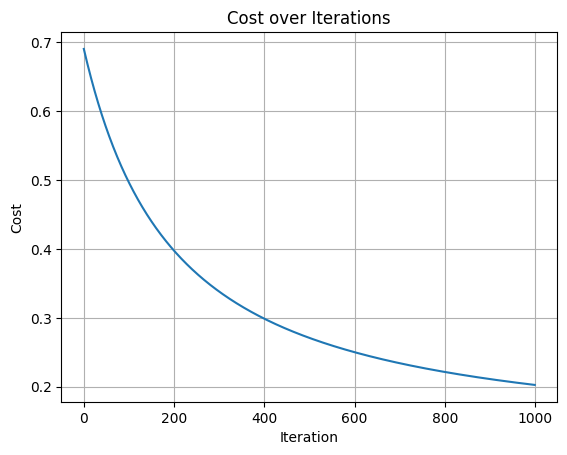

In [41]:

## **6. 🐍 Visualization: Gradient Descent Cost Over Time**

import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    eps = 1e-15
    h = np.clip(h, eps, 1 - eps)
    return -np.mean(y * np.log(h) + (1 - y) * np.log(1 - h))

def gradient_descent(X, y, theta, alpha=0.01, num_iters=1000):
    m = len(y)
    cost_history = []

    for _ in range(num_iters):
        h = sigmoid(X @ theta)
        gradient = (1 / m) * (X.T @ (h - y))
        theta -= alpha * gradient
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history
# After training...
theta_init = np.zeros(X.shape[1])
theta_final, costs = gradient_descent(X, y, theta_init)

plt.plot(costs)
plt.title("Cost over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.grid(True)
plt.show()

# 📏 **Feature Scaling**  
*(Final topic in: 🧩 2. Training the Model)*  
> What it is, why it matters, how to do it right, and what goes wrong when you don’t.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

Machine learning models (like logistic regression) work by combining features with **weights** — but if one feature has a huge range (like income in dollars) and another is tiny (like age in decades), the model can get **skewed**.

> **Analogy**: Imagine trying to compare the length of a pencil (in cm) and a skyscraper (in meters). The big number **drowns out** the smaller one.

So we use **feature scaling** to bring all features to a comparable range — **so no one feature dominates unfairly**.

### 🔑 **Key Terminology**

| Term               | Meaning or Metaphor |
|--------------------|---------------------|
| **Feature Scaling** | Leveling the playing field for features |
| **Normalization**   | Compress values to a range (like 0–1) |
| **Standardization** | Shift mean to 0 and scale to unit variance |
| **Magnitude Bias**  | When larger numbers unfairly influence the model |
| **Convergence Speed** | How quickly gradient descent finds the minimum |

---

## **2. Mathematical Deep Dive** 🧮

### 📏 **Standardization Formula**

Standardization (Z-score scaling):

$$
x' = \frac{x - \mu}{\sigma}
$$

- \( \mu \): mean of the feature
- \( \sigma \): standard deviation

Result: Feature now has **mean 0** and **std dev 1**

---

### 📏 **Min-Max Normalization Formula**

$$
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
$$

Result: Values squished into a **[0, 1] range**

---

### 🎢 **Math Intuition**

Think of your features as **players on a team**. If one player is 10x taller, stronger, and louder — it doesn't mean they’re better. It just means they’re **measured differently**.

Feature scaling gives **everyone equal say** in the model.

---

### ⚠️ **Pitfalls & Edge Cases**

| Problem | Fix |
|--------|-----|
| Feature has outliers | Use **standardization** instead of min-max |
| Scaling **before splitting** data | Causes **data leakage** — scale only on training set! |
| One-hot encoded data | Don’t scale it — it’s already binary |

---

## **3. Practical Considerations** ⚙️

### 🧪 **When Is Scaling Required?**

✅ **Required For**:
- Logistic Regression  
- KNN  
- SVM  
- Neural Nets  
- Gradient Descent (smoother path)

❌ **Not Required For**:
- Tree-based models (Decision Tree, Random Forest)

---

### 🧠 **Scikit-learn Implementation**

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Min-Max Normalization
normalizer = MinMaxScaler()
X_normed = normalizer.fit_transform(X_train)
```

🔐 **Reminder**: Always `.fit()` only on the training data, then `.transform()` both train and test.

---

## **4. Critical Analysis** 🔍

| Scaling Method   | Pros                          | Cons                             |
|------------------|-------------------------------|----------------------------------|
| **Standardization** | Robust to outliers            | Values not bounded               |
| **Min-Max**         | Keeps shape of distribution   | Sensitive to outliers            |
| **No Scaling**      | Easier, but breaks gradient descent | Slows convergence, causes bias |

---

## **5. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** Why does scaling improve gradient descent performance?

- A) It changes the cost function
- B) It adds regularization
- C) It makes the cost function surface smoother
- D) It helps with overfitting

**Correct Answer**: **C**

> Scaling reduces steep ridges and valleys, making the descent smoother and faster.

---

### 🧩 **Code Debug Task**

```python
from sklearn.preprocessing import StandardScaler

def scale_features(X_train, X_test):
    X_train_scaled = StandardScaler().fit_transform(X_train)
    X_test_scaled = StandardScaler().fit_transform(X_test)  # What's wrong?

# Fix:
def scale_features(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled
```

> **Bug**: You were fitting the scaler **again** on test data = 🔥 data leakage.

---

## **6. 📚 Glossary**

| Term            | Explanation |
|------------------|-------------|
| **Feature Scaling** | Making feature values more comparable |
| **Standardization** | Subtract mean, divide by std |
| **Normalization**   | Scale to [0, 1] range |
| **Data Leakage**    | Letting test data influence training |
| **Gradient Descent**| Optimization algorithm that benefits from scaling |

---


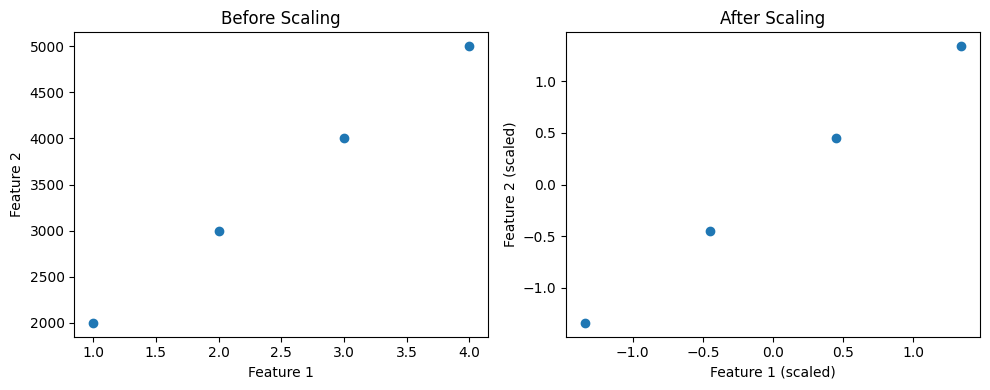

In [42]:

## **7. 🐍 Visual Example: Feature Scaling in Action**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Fake features: one small-scale, one large-scale
X = np.array([[1, 2000],
              [2, 3000],
              [3, 4000],
              [4, 5000]])

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot before and after
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.title("Before Scaling")
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.title("After Scaling")
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")

plt.tight_layout()
plt.show()


# 📊 **Accuracy, Precision, Recall, F1 Score**  
*(First topic in: 🧩 3. Evaluation & Performance)*  
> We’ll decode what each metric means, when to use them, and how to calculate them — conceptually, mathematically, and in Python.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

After training a model, the question becomes: **"How good is it?"**

Accuracy alone doesn't always tell the truth — especially when your data is **imbalanced** (e.g., 95% class 0, 5% class 1). That’s why we need **precision**, **recall**, and **F1 score** to fully understand performance.

> **Analogy**: Think of a medical test.
> - **Accuracy** is how often it gets results right.
> - **Precision** is: Of the ones it said are sick, how many actually are?
> - **Recall** is: Of all the truly sick people, how many did it catch?
> - **F1** is the balance between **being careful** and **not missing anything**.

---

### 🔑 **Key Terminology**

| Term        | Analogy / Explanation |
|-------------|------------------------|
| **True Positive (TP)** | Caught the thief and they were guilty ✅ |
| **False Positive (FP)** | Accused an innocent person ❌ |
| **True Negative (TN)** | Didn’t accuse and they were innocent ✅ |
| **False Negative (FN)** | Missed a guilty person ❌ |

---

## **2. Mathematical Deep Dive** 🧮

Given:
- TP: Correctly predicted positive  
- FP: Incorrectly predicted positive  
- FN: Missed actual positives  
- TN: Correctly predicted negative

---

### 📏 **Formulas**

#### 🧮 Accuracy:
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

> ✅ Works well when classes are **balanced**.

---

#### 🧮 Precision:
$$
\text{Precision} = \frac{TP}{TP + FP}
$$

> 🎯 How **precise** your positive predictions are.

---

#### 🧮 Recall:
$$
\text{Recall} = \frac{TP}{TP + FN}
$$

> 🧲 How well you **recall** all actual positives.

---

#### 🧮 F1 Score:
$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

> ⚖️ A balanced score that punishes extremes.

---

### ⚠️ **Pitfalls & Edge Cases**

| Scenario | Bad Metric | Better Metric |
|----------|------------|----------------|
| Imbalanced data (e.g., 95% negative) | Accuracy | Use **F1**, Precision, Recall |
| Want to avoid false positives (e.g., spam detection) | Recall | Use **Precision** |
| Want to catch every positive (e.g., cancer screening) | Precision | Use **Recall** |


### ✅ **When to Use What**

| Use Case | Metric |
|----------|--------|
| Balanced dataset | Accuracy |
| High cost of false positives | Precision |
| High cost of false negatives | Recall |
| You want a compromise | F1 Score |

---

## **3. Critical Analysis** 🔍

| Metric     | Pros                          | Cons                              |
|------------|-------------------------------|-----------------------------------|
| Accuracy   | Intuitive and fast             | Misleading on imbalanced data     |
| Precision  | Avoids false alarms            | Ignores missed detections         |
| Recall     | Catches all positives          | May include many false positives  |
| F1 Score   | Good overall performance view  | Harder to interpret than others   |

---

## **4. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** A classifier gets 95% accuracy, but only 10% precision. What’s the most likely problem?

- A) Features are poorly scaled  
- B) Labels are noisy  
- C) Dataset is imbalanced  
- D) Learning rate is too high

**Answer**: **C**

> High accuracy with low precision → likely predicting the majority class too often.

---

### 🧩 **Code Debug Task**

```python
from sklearn.metrics import f1_score

def evaluate(y_true, y_pred):
    return {
        "precision": precision_score(y_pred, y_true),  # Bug: wrong order
        "recall": recall_score(y_pred, y_true),        # Bug again
        "f1": f1_score(y_pred, y_true)
    }

# Fix:
def evaluate(y_true, y_pred):
    return {
        "precision": precision_score(y_true, y_pred),
        "recall": recall_score(y_true, y_pred),
        "f1": f1_score(y_true, y_pred)
    }
```

---

## **5. 📚 Glossary**

| Term          | Beginner-Friendly Meaning |
|---------------|----------------------------|
| **Accuracy**   | % of total predictions that were right |
| **Precision**  | Of predicted positives, how many were truly positive |
| **Recall**     | Of actual positives, how many were caught |
| **F1 Score**   | Single score combining precision & recall |
| **TP/FP/FN/TN**| Outcome categories for binary classification |

---


Accuracy: 0.84
Precision: 0.37
Recall: 0.77
F1 Score: 0.49


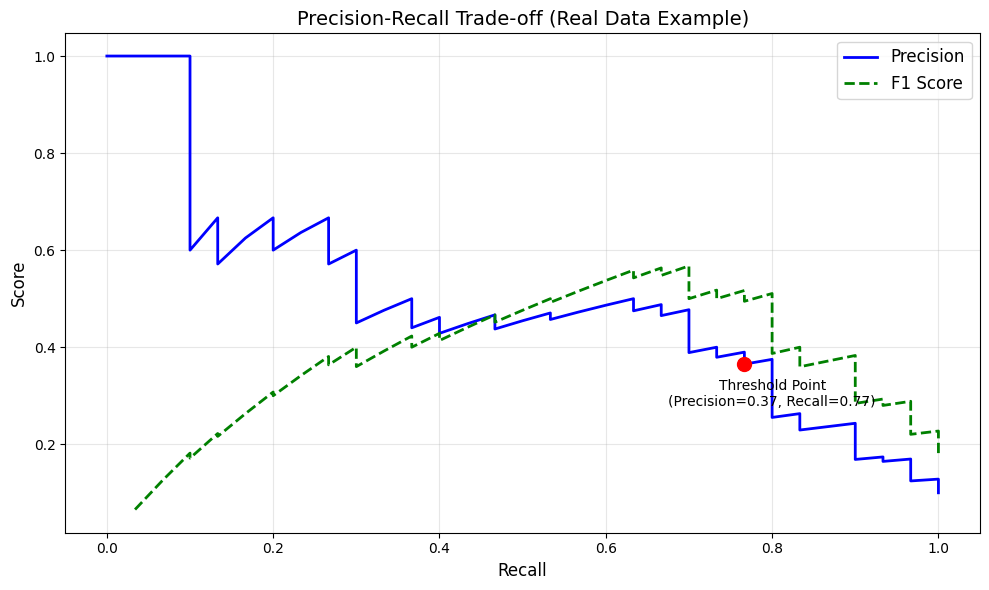

In [43]:
## **6. 🐍 Python Plot: Precision vs Recall Trade-off**

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, 
                           recall_score, f1_score, precision_recall_curve)

# 1. Generate synthetic data
X, y_true = make_classification(n_samples=1000, n_features=20, n_classes=2, 
                              weights=[0.9, 0.1], random_state=42)

# 2. Split data and train model
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.3, random_state=42)
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)

# 3. Get predictions and probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Positive class probabilities

# 4. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# 5. Calculate precision-recall curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_prob)
# Note: precisions and recalls have different lengths by design
f1s = 2 * (precisions * recalls) / (precisions + recalls + 1e-10)  # Avoid division by zero

# 6. Plot the curves
plt.figure(figsize=(10, 6))
plt.plot(recalls, precisions, 'b-', label='Precision', linewidth=2)
plt.plot(recalls[:-1], f1s[:-1], 'g--', label='F1 Score', linewidth=2)  # Match lengths
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision-Recall Trade-off (Real Data Example)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)

# Mark the operating point
plt.scatter(recall, precision, c='red', s=100, label='Model Threshold', zorder=3)
plt.annotate(f'Threshold Point\n(Precision={precision:.2f}, Recall={recall:.2f})',
             (recall, precision),
             textcoords="offset points",
             xytext=(20,-30),
             ha='center',
             fontsize=10)

plt.tight_layout()
plt.show()

# 🧩 **Confusion Matrix**  
*(Topic 2 in: 🧩 3. Evaluation & Performance)*  
> A structured, visual explanation of how classification results are broken down, interpreted, and used for deeper diagnostics.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

You trained your model and it’s making predictions. But **what exactly is it getting right and wrong**?

A **confusion matrix** tells you not just how many predictions were correct — but **how** they were correct or wrong.

> **Analogy**: Think of a confusion matrix like a courtroom scorecard:  
> - How many guilty people did we convict (TP)?  
> - How many innocent people did we mistakenly convict (FP)?  
> - How many guilty people walked free (FN)?  
> - And how many innocents were correctly freed (TN)?

It's the **foundation** for precision, recall, F1 — and the first place you look when debugging a classifier.

---

### 🔑 **Key Terminology**

| Term | Meaning / Analogy |
|------|-------------------|
| **TP (True Positive)** | Predicted 1, actual was 1 — caught the correct case |
| **FP (False Positive)** | Predicted 1, actual was 0 — false alarm |
| **FN (False Negative)** | Predicted 0, actual was 1 — missed it |
| **TN (True Negative)** | Predicted 0, actual was 0 — correctly ignored it |

---

## **2. Mathematical Deep Dive** 🧮

### 📊 **Matrix Structure**

|                 | **Predicted: 0** | **Predicted: 1** |
|-----------------|------------------|------------------|
| **Actual: 0**   | TN               | FP               |
| **Actual: 1**   | FN               | TP               |

Each cell represents a **count of examples**.

---

### 🧠 **Math Intuition**

The matrix gives you a **categorical breakdown**:
- Diagonal cells = **correct predictions**
- Off-diagonal = **errors**
- You can derive **precision, recall, accuracy, F1** from this alone

For example:
$$
\text{Precision} = \frac{TP}{TP + FP}, \quad
\text{Recall} = \frac{TP}{TP + FN}
$$

---

### ⚠️ **Pitfalls & Limitations**

| Issue | Why It Matters |
|-------|----------------|
| Only useful for **classification** (not regression) | Binary or multi-class only |
| Gets harder to interpret with 10+ classes | Becomes a large, dense matrix |
| Doesn’t show **how wrong** predictions are | Only whether it’s right/wrong |


### 🧠 **What You Can Learn From It**

- High **FPs**? Your model is **overpredicting positives**.
- High **FNs**? It's **missing actual positives**.
- Balanced diagonals? Model is doing well.

---

## **3. Critical Analysis** 🔍

| Pros of Confusion Matrix     | Cons of Confusion Matrix |
|------------------------------|---------------------------|
| Easy to interpret for 2-class problems | Gets messy with >3 classes |
| Basis for all key metrics    | Doesn’t show confidence or uncertainty |
| Useful for debugging         | No insight into *how* wrong a model was |

---

## **4. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** A classifier has a high number of false negatives. What does this suggest?

- A) The model is very conservative about predicting positives  
- B) The model is overfitting  
- C) The dataset is not scaled  
- D) There are too many false positives

**Correct Answer**: **A**

> High FNs → model is reluctant to predict positive, even when it should.

---

### 🧩 **Code Debug**

```python
from sklearn.metrics import confusion_matrix

def print_conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, normalize='true')  # Bug: wrong normalization type
    print(cm)

# Fix:
def print_conf_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
```

> `normalize='true'` may distort actual counts unless you're specifically analyzing proportions.

---

## **5. 📚 Glossary**

| Term | Beginner-Friendly Meaning |
|------|----------------------------|
| **Confusion Matrix** | A 2×2 table showing model predictions vs. reality |
| **True Positive** | Correctly caught a positive |
| **False Positive** | False alarm — predicted positive, but wasn't |
| **False Negative** | Missed case — predicted negative, but was positive |
| **True Negative** | Correctly said “not this” |

---



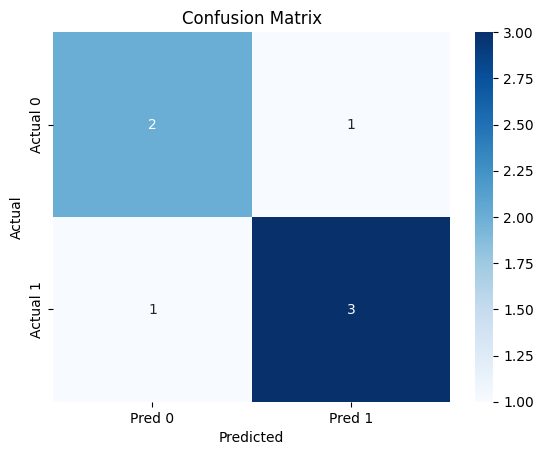

In [44]:
## **6. Practical Considerations** ⚙️


from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Example data
y_true = [1, 0, 1, 1, 0, 1, 0]
y_pred = [1, 0, 0, 1, 0, 1, 1]

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualize
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


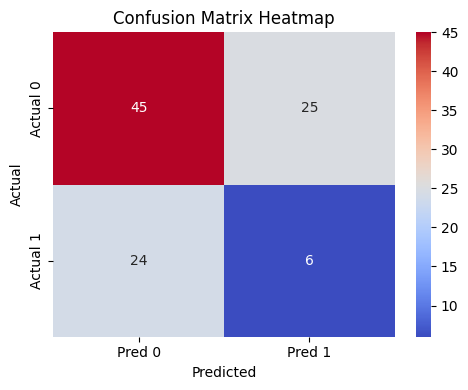

In [45]:
## **7. 🐍 Python Visualization: Simulated Confusion Matrix**

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fake labels
y_true = np.random.choice([0, 1], size=100, p=[0.7, 0.3])
y_pred = np.random.choice([0, 1], size=100, p=[0.65, 0.35])

cm = confusion_matrix(y_true, y_pred)

# Plot it
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


# 📈 **ROC Curve & AUC (Receiver Operating Characteristic & Area Under Curve)**  
*(Topic 3 in: 🧩 3. Evaluation & Performance)*  
> We explain how ROC works, why AUC matters, and how they both help evaluate classifiers *beyond accuracy*.

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

When a classifier gives you a **probability** (not just a hard label), how do you decide what's a good threshold?

**ROC curves** help you see the **trade-off between true positives and false positives** at every possible threshold — so you can make an informed choice.

> **Analogy**: Imagine a metal detector:
> - Make it too sensitive → catches everyone (including innocents)
> - Too insensitive → misses threats  
> ROC helps you visualize **how your detector behaves** at all settings.

**AUC** quantifies that — it’s a **score** from 0 to 1 telling you how good the model is at separating the classes.

---

### 🔑 **Key Terminology**

| Term            | Metaphor / Meaning |
|------------------|--------------------|
| **TPR (Recall)** | Caught the bad guys (True Positive Rate) |
| **FPR**          | Falsely accused the good guys (False Positive Rate) |
| **Threshold**    | Sensitivity level: how high must probability be to say “yes”? |
| **ROC Curve**    | A plot of TPR vs. FPR across thresholds |
| **AUC**          | Total area under the ROC curve — overall model quality |

---

## **2. Mathematical Deep Dive** 🧮

### 📊 **Core Metrics**

#### TPR (True Positive Rate, aka Recall)
$$
\text{TPR} = \frac{TP}{TP + FN}
$$

#### FPR (False Positive Rate)
$$
\text{FPR} = \frac{FP}{FP + TN}
$$

These are computed at every **classification threshold** from 0 to 1.

---

### 📈 **ROC Curve Plot**

- **X-axis**: FPR  
- **Y-axis**: TPR  
- Each point = one threshold  
- A perfect model goes to **(0,1)** — top-left corner

---

### 📐 **AUC Intuition**

- AUC = 1 → perfect classifier  
- AUC = 0.5 → random guessing  
- AUC < 0.5 → model is worse than flipping a coin

> AUC is the probability that a randomly chosen positive example scores higher than a randomly chosen negative one.

---

### ⚠️ **Pitfalls**

| Pitfall | Why It Matters |
|---------|----------------|
| AUC doesn’t care about threshold | Use Precision-Recall curve if class is imbalanced |
| ROC can look good even with bad precision | Always combine with confusion matrix/F1 |
| Doesn’t reflect cost of false positives/negatives | You must interpret with domain context |


### 🧠 **When is AUC Helpful?**

- When you care about **ranking predictions**
- When class imbalance is moderate
- When you want a **threshold-agnostic** view of model quality

---

## **3. Critical Analysis** 🔍

| Metric      | Strengths                          | Weaknesses                             |
|-------------|------------------------------------|----------------------------------------|
| **ROC Curve** | Shows full performance landscape | Doesn’t reflect precision or cost |
| **AUC Score** | Compact summary, threshold-free  | Can be misleading if classes are skewed |

---

## **4. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** What does it mean if a model has an AUC of 0.5?

- A) It’s very accurate  
- B) It’s biased  
- C) It’s as good as random guessing  
- D) It has no false negatives

**Answer**: **C**

> AUC of 0.5 = classifier has **no discriminative power**.

---

### 🧩 **Code Debug Task**

```python
from sklearn.metrics import roc_auc_score

def calc_auc(y_true, y_pred):
    return roc_auc_score(y_pred, y_true)  # Bug: wrong order!

# Fix:
def calc_auc(y_true, y_prob):
    return roc_auc_score(y_true, y_prob)
```

> **Bug**: Inputs were flipped. First arg must be true labels, second = predicted **probabilities** (not hard labels).

---

## **5. 📚 Glossary**

| Term | Beginner-Friendly Explanation |
|------|-------------------------------|
| **ROC Curve** | Graph showing how TPR/FPR change at different thresholds |
| **AUC** | A single number summarizing the ROC curve |
| **TPR** | What % of actual positives were correctly identified |
| **FPR** | What % of actual negatives were incorrectly flagged |
| **Threshold** | Cutoff point to decide between 0 and 1 |

---



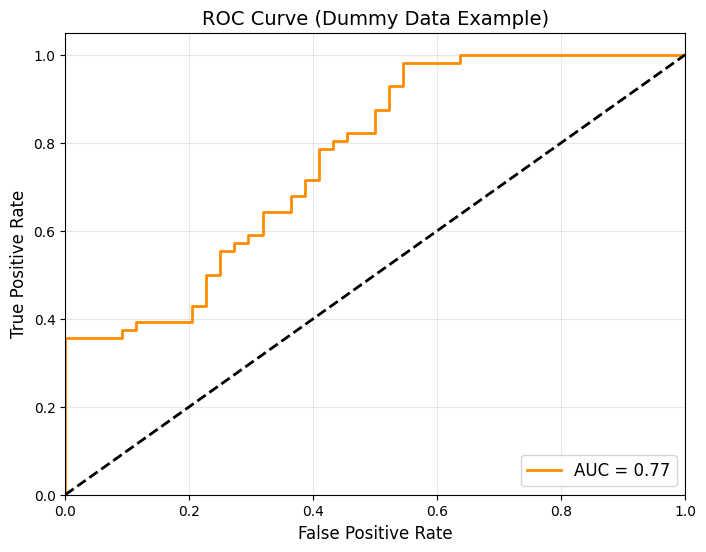

In [46]:
## **6. Practical Considerations** ⚙️

from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Generate dummy data
np.random.seed(42)
y_true = np.random.randint(0, 2, size=100)  # True binary labels (0 or 1)
y_prob = np.random.rand(100)               # Predicted probabilities (random for demo)

# For better demo, let's make the probabilities somewhat meaningful
y_prob = np.where(y_true == 1, 
                 y_prob + 0.2,  # Slightly boost probabilities for positive class
                 y_prob - 0.1)  # Slightly reduce probabilities for negative class
y_prob = np.clip(y_prob, 0, 1)  # Clip to ensure valid probability range [0,1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_prob)
auc_score = roc_auc_score(y_true, y_prob)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line = random guessing
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve (Dummy Data Example)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

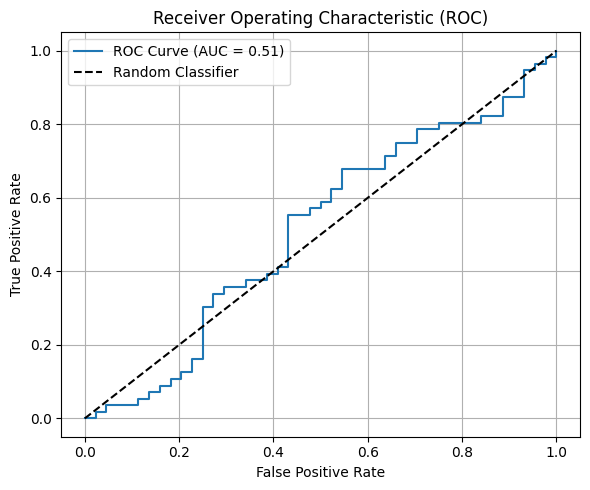

In [47]:

## **7. 🐍 Python Simulation & Visualization**

import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Simulated predictions
np.random.seed(42)
y_true = np.random.randint(0, 2, 100)
y_scores = np.random.rand(100)

# Calculate ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
auc_score = roc_auc_score(y_true, y_scores)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# 🧠 **Overfitting in Classification Models**  

---

## **1. Conceptual Foundation**

### ✅ **Purpose & Relevance**

A classifier can be **too good to be true** — performing great on training data but **terribly on new data**.

That’s **overfitting**: your model learns **the noise, quirks, and weirdness** in the training set — instead of learning the real underlying pattern.

> **Analogy**: A student who memorizes answers without understanding. They ace the practice test but fail the final exam.

Overfitting is the **enemy of generalization**. It makes your model look smart, but act dumb in real life.

---

### 🔑 **Key Terminology**

| Term               | Meaning / Metaphor |
|--------------------|--------------------|
| **Overfitting**     | Model learns the training data too well — including its noise |
| **Underfitting**    | Model is too simple to learn the underlying structure |
| **Generalization**  | How well a model performs on unseen data |
| **Variance**        | Model's sensitivity to training data changes |
| **Bias**            | Error from incorrect assumptions in the learning algorithm |

---

## **2. Mathematical Deep Dive** 🧮

### 📊 **Behavior of Overfitting**

In overfitting, **training accuracy is very high**, but **test accuracy is low**.

This often shows up when:
- The model is **too complex** (too many parameters)
- There's **too little data**
- The training runs for **too many epochs** (especially in deep learning)

---

### 📉 **Learning Curves Pattern**

| Set       | Accuracy with Overfitting |
|-----------|----------------------------|
| **Train** | Near 100%                  |
| **Test**  | Drops off, gets worse      |

You’ll often see:
- **High variance** between train and test performance
- **Low bias**, but bad generalization

---

## **3. Practical Considerations** ⚙️

### 🧠 **How to Detect It**

- **Plot train vs. test accuracy**
- **Cross-validation scores drop** when model complexity increases
- Precision/Recall/ROC on test data look weak while training metrics look great

---

### 🛡️ **How to Prevent It**

| Strategy              | Description |
|------------------------|-------------|
| **Regularization**      | Penalize complexity (e.g., L1/L2) |
| **Early Stopping**      | Stop training when validation error stops improving |
| **Cross-validation**    | Test model on multiple folds of the data |
| **Simplify Model**      | Reduce features or parameters |
| **Add More Data**       | More variety reduces memorization |
| **Dropout (NNs)**       | Randomly remove neurons during training (neural nets only) |


> Large gap = red flag for overfitting

---

## **4. Critical Analysis** 🔍

| Issue        | Result                                 | Fix                             |
|--------------|----------------------------------------|----------------------------------|
| High variance | Performs great on train, poor on test | Add regularization, simplify model |
| High bias     | Performs poorly on both train/test    | Increase model complexity       |

---

## **5. Interactive Elements** 🎯

### ✅ **Concept Check (HARD)**

**Q:** What does a large gap between training and validation accuracy most likely indicate?

- A) Model is underfitting  
- B) Features are well-scaled  
- C) Model is overfitting  
- D) Model is not trained long enough

**Answer**: **C**

> Big gap = model memorized training set but can’t generalize.

---

### 🧩 **Code Debug Task**

```python
model = LogisticRegression(C=0.0)  # Intentional bug

# Fix:
model = LogisticRegression(C=1.0)  # C must be > 0 for valid regularization
```

> `C=0.0` disables the model entirely. Use `C > 0` to apply L2 regularization properly.

---

## **6. 📚 Glossary**

| Term             | Explanation |
|------------------|-------------|
| **Overfitting**   | Model learns training data too well — including noise |
| **Generalization**| Model's ability to do well on unseen data |
| **Regularization**| Adds penalty to model complexity to reduce overfitting |
| **Cross-validation**| Technique to evaluate how model generalizes |
| **Learning Curve**| Plot of performance over training steps/data size |





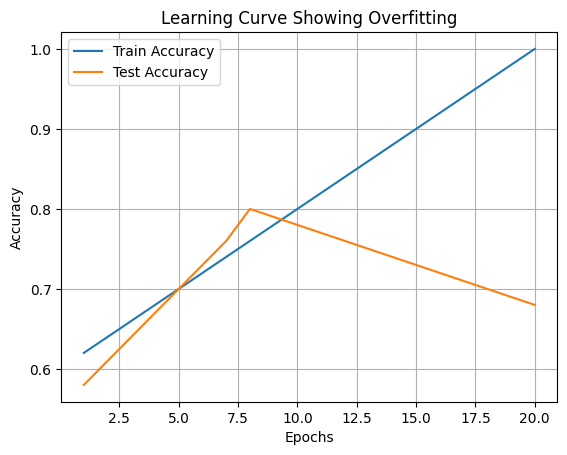

In [48]:

## **7. 🐍 Visualizing Overfitting: Learning Curves**

import matplotlib.pyplot as plt

# Simulated learning curve
epochs = list(range(1, 21))
train_scores = [0.6 + i*0.02 for i in epochs]
test_scores = [0.55 + 0.03*i if i < 8 else 0.80 - 0.01*(i-8) for i in epochs]

plt.plot(epochs, train_scores, label="Train Accuracy")
plt.plot(epochs, test_scores, label="Test Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Learning Curve Showing Overfitting")
plt.legend()
plt.grid(True)
plt.show()


In [49]:
### 🧪 **Scikit-learn Example: Overfitting Detection**

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score

# Simulate small dataset
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train with no regularization (likely to overfit)
model = LogisticRegression(C=1e6, solver='liblinear')  # Very weak regularization
model.fit(X_train, y_train)

# Accuracy
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, model.predict(X_test))

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 1.00
Test Accuracy: 1.00
